# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [2]:
dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Data preprocessing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
print('Number of persons analysed :', dataset.shape[0])
print('Number of factors :', dataset.shape[1])

Number of persons analysed : 253680
Number of factors : 22


## Check data imbalance

In [5]:
print('Number of unique values present to identify diabetes')
print(dataset['Diabetes_012'].value_counts())

Number of unique values present to identify diabetes
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


## Downsampling

In [6]:
downsampled_data = dataset.groupby('Diabetes_012').apply(lambda x: x.sample(4631))

In [7]:
print(downsampled_data)

                     Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  \
Diabetes_012                                                                   
0.0          240486           0.0     0.0       0.0        1.0  21.0     0.0   
             59729            0.0     1.0       1.0        1.0  30.0     0.0   
             97827            0.0     1.0       0.0        1.0  31.0     0.0   
             173968           0.0     1.0       0.0        1.0  37.0     0.0   
             19189            0.0     1.0       1.0        1.0  29.0     1.0   
...                           ...     ...       ...        ...   ...     ...   
2.0          165501           2.0     1.0       1.0        1.0  32.0     1.0   
             28526            2.0     1.0       1.0        1.0  25.0     0.0   
             84006            2.0     0.0       1.0        1.0  34.0     1.0   
             176434           2.0     0.0       1.0        1.0  27.0     0.0   
             69472            2.0     1.

In [8]:
downsampled_data = downsampled_data.reset_index(drop=True)

In [9]:
print(downsampled_data)

       Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0               0.0     0.0       0.0        1.0  21.0     0.0     0.0   
1               0.0     1.0       1.0        1.0  30.0     0.0     1.0   
2               0.0     1.0       0.0        1.0  31.0     0.0     0.0   
3               0.0     1.0       0.0        1.0  37.0     0.0     0.0   
4               0.0     1.0       1.0        1.0  29.0     1.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
13888           2.0     1.0       1.0        1.0  32.0     1.0     0.0   
13889           2.0     1.0       1.0        1.0  25.0     0.0     0.0   
13890           2.0     0.0       1.0        1.0  34.0     1.0     0.0   
13891           2.0     0.0       1.0        1.0  27.0     0.0     0.0   
13892           2.0     1.0       0.0        1.0  40.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           

In [10]:
print(downsampled_data['Diabetes_012'].value_counts())

Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# Classification

## Data split

In [11]:
X = downsampled_data.iloc[:, 1:]
y = downsampled_data.iloc[:, 0]

In [12]:
print(X)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         0.0       0.0        1.0  21.0     0.0     0.0   
1         1.0       1.0        1.0  30.0     0.0     1.0   
2         1.0       0.0        1.0  31.0     0.0     0.0   
3         1.0       0.0        1.0  37.0     0.0     0.0   
4         1.0       1.0        1.0  29.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13888     1.0       1.0        1.0  32.0     1.0     0.0   
13889     1.0       1.0        1.0  25.0     0.0     0.0   
13890     0.0       1.0        1.0  34.0     1.0     0.0   
13891     0.0       1.0        1.0  27.0     0.0     0.0   
13892     1.0       0.0        1.0  40.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     1.0      1.0  ...   
1                       1.0           1.0     1.0      1.0  ...   
2                       1.0           1.0     1.0      1.0  ...   
3          

In [13]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13888    2.0
13889    2.0
13890    2.0
13891    2.0
13892    2.0
Name: Diabetes_012, Length: 13893, dtype: float64


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
print(X_train)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5753      1.0       1.0        1.0  26.0     0.0     0.0   
9135      1.0       1.0        1.0  27.0     0.0     0.0   
9381      1.0       1.0        1.0  23.0     1.0     0.0   
12965     1.0       0.0        1.0  26.0     1.0     0.0   
6681      1.0       1.0        1.0  41.0     0.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13123     1.0       0.0        1.0  23.0     0.0     0.0   
3264      0.0       0.0        1.0  25.0     0.0     0.0   
9845      0.0       1.0        1.0  29.0     0.0     0.0   
10799     0.0       1.0        1.0  27.0     0.0     0.0   
2732      1.0       0.0        1.0  31.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
5753                    0.0           1.0     0.0      1.0  ...   
9135                    0.0           1.0     1.0      1.0  ...   
9381                    1.0           0.0     1.0      1.0  ...   
12965      

In [16]:
print(y_train)

5753     1.0
9135     1.0
9381     2.0
12965    2.0
6681     1.0
        ... 
13123    2.0
3264     0.0
9845     2.0
10799    2.0
2732     0.0
Name: Diabetes_012, Length: 11114, dtype: float64


In [17]:
print(X_test)

      HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
2818     1.0       1.0        1.0  32.0     0.0     1.0                   1.0   
9003     0.0       0.0        1.0  34.0     0.0     0.0                   0.0   
6481     1.0       1.0        1.0  39.0     1.0     0.0                   0.0   
5193     0.0       1.0        1.0  28.0     1.0     0.0                   0.0   
7028     0.0       0.0        1.0  24.0     1.0     0.0                   0.0   
...      ...       ...        ...   ...     ...     ...                   ...   
8133     0.0       1.0        1.0  23.0     1.0     0.0                   0.0   
6978     0.0       1.0        1.0  43.0     1.0     0.0                   0.0   
8783     1.0       1.0        1.0  32.0     0.0     0.0                   0.0   
6789     1.0       1.0        1.0  35.0     1.0     1.0                   1.0   
6878     1.0       1.0        1.0  32.0     0.0     0.0                   0.0   

      PhysActivity  Fruits 

In [18]:
print(y_test)

2818    0.0
9003    1.0
6481    1.0
5193    1.0
7028    1.0
       ... 
8133    1.0
6978    1.0
8783    1.0
6789    1.0
6878    1.0
Name: Diabetes_012, Length: 2779, dtype: float64


# Random forest classification

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predict test result

In [20]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[521 211 152]
 [292 328 305]
 [179 340 451]]


0.46779417056495143

# Data visualisation

Text(0.5, 1.0, 'Confusion Matrix')

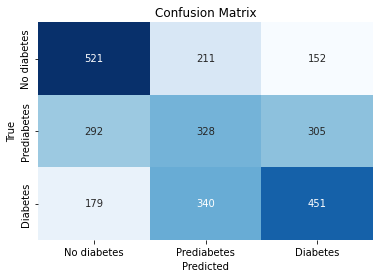

In [22]:
custom_labels = ['No diabetes', 'Prediabetes', 'Diabetes']
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Feature ranking

In [23]:
feature_importances = classifier.feature_importances_

In [24]:
print(feature_importances)

[0.034172   0.02931075 0.00619048 0.17055629 0.0388733  0.01066966
 0.01805215 0.03002127 0.03638923 0.028059   0.00981886 0.00990156
 0.01612025 0.07380401 0.06296823 0.07644386 0.01842685 0.03942801
 0.13064972 0.06205067 0.09809384]


In [25]:
column_names = np.array(list(X.columns))
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature ranking:")
for f in range(len(feature_importances)):
    print(f"{f + 1}. {column_names[sorted_indices[f]]} - Importance: {feature_importances[sorted_indices[f]]}")

Feature ranking:
1. BMI - Importance: 0.17055628927119823
2. Age - Importance: 0.13064972356465893
3. Income - Importance: 0.09809384349620079
4. PhysHlth - Importance: 0.0764438561291776
5. GenHlth - Importance: 0.07380401299032527
6. MentHlth - Importance: 0.06296823327202858
7. Education - Importance: 0.062050669859107566
8. Sex - Importance: 0.03942801441005353
9. Smoker - Importance: 0.038873304485184494
10. Fruits - Importance: 0.036389234731407566
11. HighBP - Importance: 0.034171997356956155
12. PhysActivity - Importance: 0.030021265774702405
13. HighChol - Importance: 0.02931074506865709
14. Veggies - Importance: 0.02805899581906236
15. DiffWalk - Importance: 0.018426853144325666
16. HeartDiseaseorAttack - Importance: 0.018052154496095374
17. NoDocbcCost - Importance: 0.016120249871457333
18. Stroke - Importance: 0.010669655750303646
19. AnyHealthcare - Importance: 0.009901562731203227
20. HvyAlcoholConsump - Importance: 0.009818859482441943
21. CholCheck - Importance: 0.00619

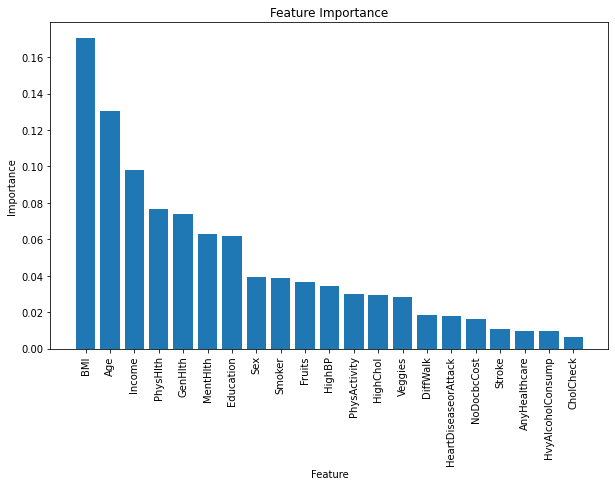

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(column_names[sorted_indices], feature_importances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()